# Part 1. Data Wrangling:

This capstone looks at tweets from a 5-year period of the CEOS of several companies. Their respective stocks are collected and the tweets are analyzed to determine if the closing price of a stock can be determined from the CEO's tweets. The CEOs, their twitter username, and their associated stocks are as follows:  
 - Elon Musk : '@elonmusk': Tesla (TSLA)
 - Aaron Levie : '@levie': Box (BOX)
 - Jack Dorsey : '@jack': Twitter (TWTR)
 - Marc Benioff : '@Benioff': Salesforce (CRM)
 - Richard Branson: @richardbranson: Virgin Galactic (SPCE)
 - John Legere: @JohnLegere: T-Mobile (TMUS)
 
 
These CEOs were selected with the following criteria:  
 - the stock must be a publicly traded company for at least 5 years.
 - the CEO must have tweeted at least 500 times over that span of that 5 years.
 


## Objective: 

To scrape the tweets and stocks from the CEOS, clean these data by standardizing dates and times, dealing with null values, and then to combine these cleaned dataframes into a single dataframe for EDA and machine learning. All datetimes are in EST.

In [70]:
from utils import *

# Collecting Data

## Collecting Stocks 

In [71]:
# Import 5-year daily tesla stocks from Yahoo Finance and store in dataframe

#tsla = yf.Ticker('TSLA')
#box = yf.Ticker('BOX')
#twtr = yf.Ticker('TWTR')
#crm = yf.Ticker('CRM')
#spce = yf.Ticker('SPCE')
#tmus = yf.Ticker('TMUS')



# Convert to dataframes
#tsla_df = tsla.history(period = '5y')
#box_df = box.history(period = '5y')
#twtr_df = twtr.history(period = '5y')
#crm_df = crm.history(period = '5y')
#spce_df = spce.history(period='5y')
#tmus_df = tmus.history(period='5y')



stock_names = ['TSLA','BOX', 'TWTR','CRM','SPCE', 'TMUS']
stocks = {}
for stock in stock_names:
    stocks[stock] = pd.read_pickle(f'data/{stock}.pkl')

In [72]:
# Examine stocks
#stocks = { 'TSLA': tsla_df, 'BOX': box_df, 'TWTR': twtr_df, 'CRM':crm_df, 'SPCE': spce_df, 'TMUS':tmus_df}

for stock in stocks:
    print("===============")
    print(stock)
    print("===============")
    print(stocks[stock].info())
    print(stocks[stock].head(3))
    stocks[stock].to_pickle(f'./data/{stock}.pkl')

TSLA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1259 non-null   datetime64[ns]
 1   Open          1259 non-null   float64       
 2   High          1259 non-null   float64       
 3   Low           1259 non-null   float64       
 4   Close         1259 non-null   float64       
 5   Volume        1259 non-null   int64         
 6   Dividends     1259 non-null   int64         
 7   Stock Splits  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 78.8 KB
None
        Date       Open       High        Low      Close    Volume  Dividends  \
0 2016-08-23  44.863998  45.698002  44.560001  44.967999  23922000          0   
1 2016-08-24  45.410000  45.430000  44.444000  44.523998  12853500          0   
2 2016-08-25  44.622002  44.759998  44.153999  44.192001   8812500     

I will keep the Open and Close columns, dropping the rest. The Open and Close columns will be changed to their respective times and combined into a single dataframe.

### 1.2.2 Combining the Stocks <a id='1.2.2_Combining_Stocks'></a>

In [73]:
# Get needed columns and change the date to lowercase

for stock in stocks:
    stocks[stock].reset_index(inplace=True)
    stocks[stock] =  stocks[stock][['Date','Open', 'Close']]
    stocks[stock].columns = stocks[stock].columns.str.lower()

In [74]:
for stock in stocks:
    print(stock.upper())
    print("=======================")
    print(stocks[stock][stocks[stock]['date'] == stocks[stock]['date']].min())
    print(stocks[stock][stocks[stock]['date'] == stocks[stock]['date']].max())
    print("")

TSLA
date     2016-08-23 00:00:00
open               36.220001
close              35.793999
dtype: object
date     2021-08-23 00:00:00
open              891.380005
close             883.090027
dtype: object

BOX
date     2016-08-23 00:00:00
open                    8.75
close                   9.12
dtype: object
date     2021-08-23 00:00:00
open                   29.25
close                  29.01
dtype: object

TWTR
date     2016-08-23 00:00:00
open                    14.3
close                  14.29
dtype: object
date     2021-08-23 00:00:00
open               78.360001
close              77.629997
dtype: object

CRM
date     2016-08-23 00:00:00
open               66.589996
close              68.410004
dtype: object
date     2021-08-23 00:00:00
open              283.470001
close                 281.25
dtype: object

SPCE
date     2017-09-29 00:00:00
open                    7.19
close                   7.22
dtype: object
date     2021-08-23 00:00:00
open                   58.59
close 

The stock data is limited to 5 years. So to determine how far back the tweets need to be scraped, I'll convert the starting date index to a string that the twint module can recognize to set a starting date. I'll also set the entire range of dates (e.g. holidays and weekends) to the stock data and interpolate the missing values.

Our goal is to predict stock changes based off twitter data that occurs before the next opening or closing price. To get the data into a workable format, I will need to combine the opening and closing stock prices and sort them by date and time. Missing prices (holidays, weekends, etc...) will be filled via mean imputation on the organized stocks. 

In [75]:
for stock in stocks:
    stocks[stock] = organize_stocks(stocks[stock])

### 1.2.3 Examine Collected Stocks <a id='1.2.3_Examine_Stocks'></a>

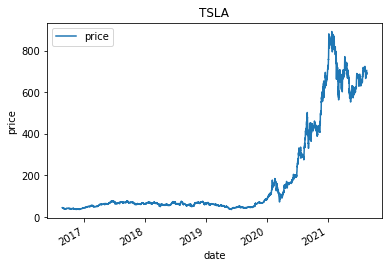

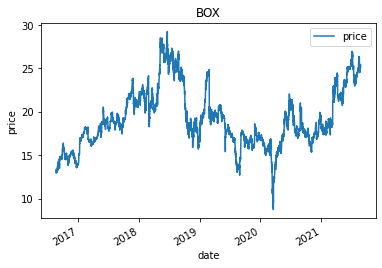

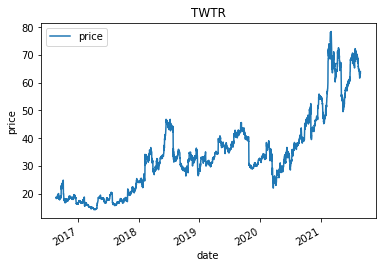

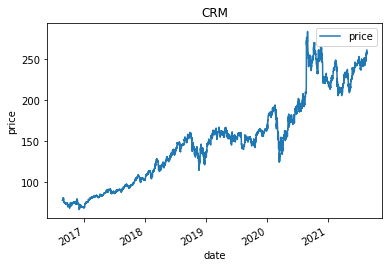

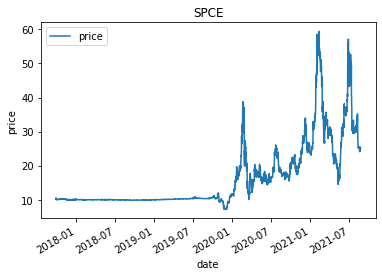

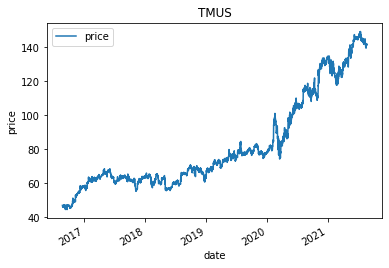

In [76]:
for stock in stocks:
    _ = stocks[stock].plot()
    _ = plt.xlabel('date')
    _ = plt.ylabel('price')
    _ = plt.title(stock)
    plt.savefig('./figures/data_wrangling/stocks_{}.png'.format(stock), bbox_inches='tight')

In [77]:
for stock in stocks:
    print(stock)
    print(stocks[stock].info())

TSLA
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2016-08-23 09:30:00 to 2021-08-23 16:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   3654 non-null   float64
dtypes: float64(1)
memory usage: 57.1 KB
None
BOX
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2016-08-23 09:30:00 to 2021-08-23 16:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   3654 non-null   float64
dtypes: float64(1)
memory usage: 57.1 KB
None
TWTR
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2016-08-23 09:30:00 to 2021-08-23 16:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   3654 non-null   float64
dtypes: float64(1)
memory usage: 57.1 KB
None
CRM
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2016-08-23 09:30:0

All of the stocks have the same number of values with the exception of Virgin Galactic, which has been on the NYSE for less than the 5 year max alloted by yfinance. No missing numbers are detected.

### De-trending the time series stock data 

We will use the percent change in the stock prices as a target that we will later bin into categories.  

In [78]:
for stock in stocks:
    stocks[stock]['percent change'] = stocks[stock]['price'].pct_change()
    stocks[stock].fillna(0, inplace=True)

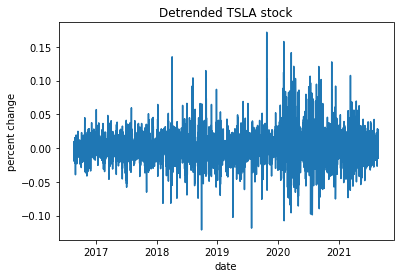

In [79]:
_ = plt.plot(stocks['TSLA'][['percent change']])
_ = plt.xlabel('date')
_ = plt.ylabel('percent change')
_ = plt.title('Detrended TSLA stock')
plt.savefig('./figures/data_wrangling/detrended_stock.png', bbox_inches='tight')

In [80]:
#for stock in stocks:
#    stocks[stock].to_pickle(f'./data/{stock}_df.pkl')

## 1.2.5 Collecting the tweets <a id='1.2.5_Collecting_Tweet'></a>
We will collect the CEOs tweets over the same time-span as the collected stocks

In [81]:
# Get the tweets from the CEOs of the companies
# Get user_ids in case of name changes. 

        
user_stocks = {'elonmusk':'TSLA', 'levie':'BOX','jack':'TWTR', 'Benioff':'CRM', 
            'richardbranson':'SPCE', 'JohnLegere':'TMUS'}

In [82]:
#start_date = {}
#for user in user_stocks:
#    start_date[user] = dt.strftime(stocks[user_stocks[user]].reset_index().date.min(), '%Y-%m-%d %H:%M:%S')

In [83]:
usernames = list(user_stocks.keys())

In [84]:
#%%time

#ceos = []
#for user in usernames:
#    c = twint.Config()
#    c.Username = user
#    c.User_full = True
#    c.Count = True
#    c.Stats = True
#    c.Pandas = True
#    c.Store_pandas = True
#    c.Hide_output = True
#    c.Pandas_clean = True
#    c.Since = start_date[user]

    # run search
#    twint.run.Search(c)

# extract columns and save dataframe in list
#columns = twint.output.panda.Tweets_df.columns
#ceo = twint.output.panda.Tweets_df[columns]
#ceos.append(ceo)


ceos = pd.read_pickle('./data/ceos.pkl')
usernames = ['elonmusk', 'levie', 'jack', 'Benioff','richardbranson', 'JohnLegere']

In [85]:
ceos.head()

id      conversation_id               created_at  \
0  1417453075892080641  1417427520266268677  2021-07-20 07:55:22 EDT   
1  1417390555001098246  1417251070989029376  2021-07-20 03:46:56 EDT   
2  1417293886897098762  1417278493428264963  2021-07-19 21:22:49 EDT   
3  1417277335863140363  1417277092090191884  2021-07-19 20:17:03 EDT   
4  1417274819461095432  1417274819461095432  2021-07-19 20:07:03 EDT   

         date      time timezone   user_id  username       name place  ...  \
0  2021-07-20  07:55:22    -0400  44196397  elonmusk  Elon Musk        ...   
1  2021-07-20  03:46:56    -0400  44196397  elonmusk  Elon Musk        ...   
2  2021-07-19  21:22:49    -0400  44196397  elonmusk  Elon Musk        ...   
3  2021-07-19  20:17:03    -0400  44196397  elonmusk  Elon Musk        ...   
4  2021-07-19  20:07:03    -0400  44196397  elonmusk  Elon Musk        ...   

  source user_rt_id user_rt retweet_id  \
0                                        
1                                        
2                                        
3                                        
4                                        

                                            reply_to  retweet_date  translate  \
0  [{'screen_name': 'vincent13031925', 'name': 'V...                            
1  [{'screen_name': 'blueorigin', 'name': 'Blue O...                            
2  [{'screen_name': 'SpacePadreIsle', 'name': 'SP...                            
3  [{'screen_name': 'TLPN_Official', 'name': 'The...                            
4                                                 []                            

   trans_src trans_dest search  
0                         None  
1                         None  
2                         None  
3                         None  
4                         None  

[5 rows x 37 columns]

In [150]:
len(ceos.columns)

37

Lets look at the number of tweets and the dates they span for each executive.

In [86]:
CEOS = {}
for user in usernames:
    CEOS[user] = ceos[ceos['username'] == user]   

In [87]:
start_date = {}
end_date = {}
for CEO in CEOS:
    print(CEO.upper())
    print('number of tweets:', len(CEOS[CEO]))
    print('date range:')
    start_date[CEO] = CEOS[CEO]['date'].min()
    end_date[CEO] = CEOS[CEO]['date'].max()
    print(start_date[CEO], '---' ,end_date[CEO])
    print("")

ELONMUSK
number of tweets: 11622
date range:
2016-07-20 --- 2021-07-20

LEVIE
number of tweets: 1736
date range:
2016-07-21 --- 2021-07-20

JACK
number of tweets: 5124
date range:
2016-07-21 --- 2021-07-20

BENIOFF
number of tweets: 4871
date range:
2016-07-20 --- 2021-05-28

RICHARDBRANSON
number of tweets: 7711
date range:
2017-09-29 --- 2021-07-20

JOHNLEGERE
number of tweets: 37302
date range:
2016-07-20 --- 2021-07-20



In [88]:
#all_tweets = pd.DataFrame()
#for CEO in CEOS:
#    all_tweets = all_tweets.append(CEOS[CEO])
    
#all_tweets.to_pickle(f'/Users/tylerpoore/Workspace/Spring Board/Projects/Capstone_notebooks/Capstone_1_Final/data/ceos.pkl')

## Examing and Cleaning the Data 

### Examining The Tweets 

In [89]:
# Examine the scraped data

for CEO in CEOS:
    print("================")
    print(CEO)
    print("================")
    print(CEOS[CEO][['date','tweet']].head(3))

elonmusk
         date                               tweet
0  2021-07-20     @vincent13031925 Great to hear!
1  2021-07-20  @blueorigin Best of luck tomorrow!
2  2021-07-19        @SpacePadreIsle @SpaceX Haha
levie
         date                                              tweet
0  2021-07-20        This is a very sad take on entrepreneurship
1  2021-07-20  Space innovation from many ventures is just pl...
2  2021-07-20                   Amazing  https://t.co/YGDtOVvm92
jack
         date                                              tweet
0  2021-07-20  Square Banking is live! Checking, savings, deb...
1  2021-07-19                                 @cslingsby Español
2  2021-07-19                            https://t.co/Sip86oI6fU
Benioff
         date                                              tweet
0  2021-05-28  Wonderful to be on @MadMoneyOnCNBC tonight ann...
1  2021-05-27  It’s happening! @Dreamforce ❤️ https://t.co/7V...
2  2021-05-27  Here comes Dreamforce 2021!  In person!  A

The raw twitter data has mentions, urls, emojis, and other languages besides english at first glance. 

In [90]:
# Examine the tweet columns

CEOS['elonmusk'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11622 entries, 0 to 11621
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               11622 non-null  object
 1   conversation_id  11622 non-null  object
 2   created_at       11622 non-null  object
 3   date             11622 non-null  object
 4   time             11622 non-null  object
 5   timezone         11622 non-null  object
 6   user_id          11622 non-null  int64 
 7   username         11622 non-null  object
 8   name             11622 non-null  object
 9   place            11622 non-null  object
 10  tweet            11622 non-null  object
 11  language         11622 non-null  object
 12  mentions         11622 non-null  object
 13  urls             11622 non-null  object
 14  photos           11622 non-null  object
 15  replies_count    11622 non-null  int64 
 16  retweets_count   11622 non-null  int64 
 17  likes_count      11622 non-null

Looking at the dataframe columns entries, there are no missing values. That may be because they are using a different character than NaN, and I will look into this later. Most are of type object, but there are 4 integer columns: user_id; reply, retweet, and like counts; and video for some odd reason; and 1 boolean retweet column. All of the columns are the same type. Let's examine the columns.

In [92]:
# Look at sample integer columns

CEOS['elonmusk'].select_dtypes(include=['int']).describe()

user_id  replies_count  retweets_count   likes_count         video
count     11622.0   11622.000000    11622.000000  1.162200e+04  11622.000000
mean   44196397.0     985.211065     2602.205989  2.602342e+04      0.060833
std           0.0    3843.169195    10442.067297  7.333076e+04      0.239034
min    44196397.0       0.000000        0.000000  9.100000e+01      0.000000
25%    44196397.0      55.000000       49.000000  1.204000e+03      0.000000
50%    44196397.0     143.500000      163.000000  3.655500e+03      0.000000
75%    44196397.0     534.750000      984.000000  1.542325e+04      0.000000
max    44196397.0  126196.000000   355536.000000  1.574723e+06      1.000000

The video column looks like a boolean

In [93]:
CEOS['elonmusk']['video'].nunique()

2

In [94]:
CEOS['elonmusk']['video'].sum()

707

In [95]:
# Look at first set of object columns

CEOS['elonmusk'].select_dtypes(include=['object']).describe()

id     conversation_id               created_at  \
count                 11622               11622                    11622   
unique                11622                5665                    11619   
top     1417453075892080641  828280866451374085  2018-04-01 18:02:31 EDT   
freq                      1                  34                        2   

              date      time timezone  username       name  place  \
count        11622     11622    11622     11622      11622  11622   
unique        1465     10736        1         1          1      1   
top     2017-03-24  15:39:16    -0400  elonmusk  Elon Musk          
freq            49         4    11622     11622      11622  11622   

                tweet  ... source user_rt_id user_rt retweet_id reply_to  \
count           11622  ...  11622      11622   11622      11622    11622   
unique          11554  ...      1          1       1          1     5620   
top     @flcnhvy True  ...                                            []   
freq                6  ...  11622      11622   11622      11622     2967   

       retweet_date translate trans_src trans_dest search  
count         11622     11622     11622      11622  11622  
unique            1         1         1          1      1  
top                                                  None  
freq          11622     11622     11622      11622  11622  

[4 rows x 31 columns]

A lot of these columns I will exclude as they likely won't contribute any contributable features to predicting the stock price. I will determine the language after cleaning the tweets.

In [96]:
CEOS['elonmusk'][['tweet', 'mentions', 'urls', 'photos','hashtags', 'cashtags', 'quote_url']].describe()

tweet mentions   urls photos hashtags cashtags quote_url
count           11622    11622  11622  11622    11622    11622     11622
unique          11554      137    746    640       17        2       382
top     @flcnhvy True       []     []     []       []       []          
freq                6    11357  10812  10983    11604    11621     11231

The missing values are represented by empty lists. Let's turn this into a better represenation of missing values.

Let's look at the languages first.

In [97]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO]['language'].value_counts()[:5])

ELONMUSK
en     10105
und     1123
tl       123
fr        38
de        36
Name: language, dtype: int64
LEVIE
en     1677
und      44
fr        5
es        3
it        2
Name: language, dtype: int64
JACK
en     4041
und     983
es       18
fr       15
in       11
Name: language, dtype: int64
BENIOFF
en     4696
und     117
fr       17
pt        9
es        7
Name: language, dtype: int64
RICHARDBRANSON
en     7652
und      48
fr        3
tl        3
ro        2
Name: language, dtype: int64
JOHNLEGERE
en     28752
und     8207
pt       152
es        55
fr        33
Name: language, dtype: int64


Let's see what und is

In [98]:
CEOS['elonmusk']['tweet'][CEOS['elonmusk']['language'] == 'und']

15                                  @waitbutwhy Pohtaytohz
28                                 https://t.co/d4ZOSKZESP
31       @JeffTutorials @TonyTesla4Life @WholeMarsBlog Yes
44                    @AaronS5_ @FrenchieEAP @karpathy Yes
53                                      @Kristennetten Yup
                               ...                        
11505                                    @huntster1701 yes
11506                                      @DavidKYoon yes
11540                                 @asunshinegreene yes
11605                              https://t.co/Kgkz1Z3FwJ
11616                                         @vitiral yup
Name: tweet, Length: 1123, dtype: object

It looks like und occurs when there are a lot of mentions, links, or emojis, so I will keep this and clean them later. 

In [99]:
# Keep the en and und languages 
for CEO in CEOS:
    CEOS[CEO] = CEOS[CEO][(CEOS[CEO]['language'] == 'en') | (CEOS[CEO]['language'] == 'und')]
    CEOS[CEO].reset_index(inplace=True, drop=True)

In [100]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO]['language'].value_counts())
    print(CEOS[CEO]['language'].value_counts().sum())

ELONMUSK
en     10105
und     1123
Name: language, dtype: int64
11228
LEVIE
en     1677
und      44
Name: language, dtype: int64
1721
JACK
en     4041
und     983
Name: language, dtype: int64
5024
BENIOFF
en     4696
und     117
Name: language, dtype: int64
4813
RICHARDBRANSON
en     7652
und      48
Name: language, dtype: int64
7700
JOHNLEGERE
en     28752
und     8207
Name: language, dtype: int64
36959


### 1.3.2 Converting to Missing Values and Categorical Features <a id='1.3.2_Missing'></a>

In [101]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']].head(3))

ELONMUSK
  mentions urls photos hashtags cashtags thumbnail
0       []   []     []       []       []          
1       []   []     []       []       []          
2       []   []     []       []       []          
LEVIE
  mentions urls                                             photos hashtags  \
0       []   []                                                 []       []   
1       []   []                                                 []       []   
2       []   []  [https://pbs.twimg.com/media/E6vgkwJUcAIUI5z.jpg]       []   

  cashtags                                        thumbnail  
0       []                                                   
1       []                                                   
2       []  https://pbs.twimg.com/media/E6vgkwJUcAIUI5z.jpg  
JACK
  mentions                                  urls  \
0       []  [https://squareup.com/us/en/banking]   
1       []                                    []   
2       []        [https://youtu.be/VcjzHMhBtf0]   

  

In [102]:
# Convert empty lists into NaNs for easier processing
for CEO in CEOS:
    CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']] = CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags','cashtags', 'thumbnail']].applymap(lambda x: np.nan if len(x) == 0 else x)
    

In [103]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']].info())

ELONMUSK
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11228 entries, 0 to 11227
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mentions   259 non-null    object 
 1   urls       775 non-null    object 
 2   photos     607 non-null    object 
 3   hashtags   18 non-null     object 
 4   cashtags   0 non-null      float64
 5   thumbnail  672 non-null    object 
dtypes: float64(1), object(5)
memory usage: 526.4+ KB
None
LEVIE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   mentions   81 non-null     object
 1   urls       165 non-null    object
 2   photos     135 non-null    object
 3   hashtags   12 non-null     object
 4   cashtags   2 non-null      object
 5   thumbnail  148 non-null    object
dtypes: object(6)
memory usage: 80.8+ KB
None
JACK
<class 'pandas.core.frame.Dat

In [104]:
for CEO in CEOS:
    print(CEO.upper())
    print('\n')
    print('missing values')
    print('===============')
    print(CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']].isna().sum())
    print('\n')

ELONMUSK


missing values
mentions     10969
urls         10453
photos       10621
hashtags     11210
cashtags     11228
thumbnail    10556
dtype: int64


LEVIE


missing values
mentions     1640
urls         1556
photos       1586
hashtags     1709
cashtags     1719
thumbnail    1573
dtype: int64


JACK


missing values
mentions     4295
urls         3900
photos       4562
hashtags     4614
cashtags     5019
thumbnail    4554
dtype: int64


BENIOFF


missing values
mentions     2446
urls         2201
photos       3162
hashtags     4484
cashtags     4813
thumbnail    2787
dtype: int64


RICHARDBRANSON


missing values
mentions     4300
urls         1369
photos       2240
hashtags     4958
cashtags     7700
thumbnail    1767
dtype: int64


JOHNLEGERE


missing values
mentions     29409
urls         29580
photos       27902
hashtags     27771
cashtags     36737
thumbnail    27019
dtype: int64




In [105]:
categ = ['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']
for categorical in categ:
    print(categorical.upper())
    print(CEOS['JohnLegere'][categorical][~CEOS['JohnLegere'][categorical].isna()])
    print('===========')

MENTIONS
6        [{'screen_name': 'lifehacker', 'name': 'lifeha...
18       [{'screen_name': 'neilbarua', 'name': 'neil ba...
20       [{'screen_name': 'candace_parker', 'name': 'ca...
29       [{'screen_name': 'coolcatsnft', 'name': 'cool ...
43       [{'screen_name': 'richardbranson', 'name': 'ri...
                               ...                        
36951    [{'screen_name': 'theorlandojones', 'name': 'o...
36952    [{'screen_name': 'tmobile', 'name': 't-mobile'...
36954    [{'screen_name': 'att', 'name': 'at&t', 'id': ...
36956    [{'screen_name': 'att', 'name': 'at&t', 'id': ...
36957    [{'screen_name': 'att', 'name': 'at&t', 'id': ...
Name: mentions, Length: 7550, dtype: object
URLS
0        [https://www.buzzfeed.com/juliawilling/milo-an...
1        [https://www.theverge.com/2021/7/19/22580542/j...
3        [https://mashable.com/article/nasa-hubble-imag...
5        [https://www.buzzfeed.com/hannahloewentheil/pe...
6        [https://lifehacker.com/youve-probably-been-pi..

In [106]:
%%time
# Change categoricals to binary values
for CEO in CEOS:
    for categorical in categ:
        CEOS[CEO][categorical][CEOS[CEO][categorical].isnull()] = 0

for CEO in CEOS:
    for categorical in categ:
        for i in range(len(CEOS[CEO])):
            if CEOS[CEO][categorical].iloc[i] != 0:
                if categorical != 'thumbnail':
                    CEOS[CEO][categorical].iloc[i] = len(CEOS[CEO][categorical].iloc[i])
                else:
                    CEOS[CEO]['thumbnail'].iloc[i] = 1

CPU times: user 1min 9s, sys: 734 ms, total: 1min 10s
Wall time: 1min 16s


In [107]:
for CEO in CEOS:
    CEOS[CEO]['cashtags'] = CEOS[CEO]['cashtags'].astype(int)

In [108]:
for CEO in CEOS:
    print(CEO.upper())
    for categorical in categ:
        print(CEOS[CEO][categorical].value_counts())
        print('============')

ELONMUSK
0    10969
1      230
2       25
3        2
4        2
Name: mentions, dtype: int64
0    10453
1      765
2        9
3        1
Name: urls, dtype: int64
0    10621
1      571
2       23
3       11
4        2
Name: photos, dtype: int64
0    11210
1       17
2        1
Name: hashtags, dtype: int64
0    11228
Name: cashtags, dtype: int64
0    10556
1      672
Name: thumbnail, dtype: int64
LEVIE
0    1640
1      64
2      15
3       2
Name: mentions, dtype: int64
0    1556
1     164
2       1
Name: urls, dtype: int64
0    1586
1     127
2       6
4       2
Name: photos, dtype: int64
0    1709
1      12
Name: hashtags, dtype: int64
0    1719
1       2
Name: cashtags, dtype: int64
0    1573
1     148
Name: thumbnail, dtype: int64
JACK
0    4295
1     571
2     118
3      30
4       8
8       1
9       1
Name: mentions, dtype: int64
0    3900
1    1113
2      11
Name: urls, dtype: int64
0    4562
1     411
2      25
4      16
3      10
Name: photos, dtype: int64
0    4614
1     386
2

### 1.3.3 Select Feature Columns and Combine Tweets for Each Day <a id='1.3.3_Features'></a>

I will be keeping most of the categorical and int features, but I won't be keeping the Cashtag column as it is empty for most of the tweets

In [109]:
# Set appropriate columns 

for CEO in CEOS:
    CEOS[CEO] = CEOS[CEO][[
        'date', 'time', 'username', 'tweet', 
        'mentions', 'hashtags', 'cashtags', 'video', 'photos', 'urls', 'thumbnail', 
        'replies_count', 'retweets_count', 'likes_count',
       ]]

In [110]:
# Need to change some of the features to integers
for CEO in CEOS:
    CEOS[CEO].fillna(0, inplace=True)

I will make a separate dataframe for these and append them to a dataframe of tweets that have been grouped by the date. Because I am looking how tweets impact the stock prices, I want to analyze tweets that happen before the price point. To this end I will be looking at the closing price, and tweets that occur on the same day after the market closes will be counted towards the following day. 

In [111]:
num_tweets = len(CEOS['elonmusk'])

In [112]:
num_tweets

11228

In [113]:
%%time 
for CEO in CEOS:
    CEOS[CEO] = combine_tweets(CEOS[CEO])

CPU times: user 1min 59s, sys: 1.59 s, total: 2min
Wall time: 2min 14s


In [114]:
assert num_tweets == CEOS['elonmusk']['number of tweets'].sum()

In [115]:
for CEO in CEOS:
    print(CEO.upper())
    print('Number of days collected: {}'.format(CEOS[CEO].shape[0]))
    print("")

ELONMUSK
Number of days collected: 2179

LEVIE
Number of days collected: 957

JACK
Number of days collected: 1476

BENIOFF
Number of days collected: 1868

RICHARDBRANSON
Number of days collected: 2009

JOHNLEGERE
Number of days collected: 3415



## 1.4 Combining Stocks and Tweets DataFrames <a id='1.4_Combining_DataFrames'></a>

In [116]:
# merge stocks on to tweets
for stock in stocks:
    stocks[stock].reset_index(inplace=True)
    print(stock.upper)
    print(stocks[stock].head(3))
    print("")

<built-in method upper of str object at 0x7fd4ec643130>
                 date      price  percent change
0 2016-08-23 09:30:00  44.863998        0.000000
1 2016-08-23 16:00:00  44.967999        0.002318
2 2016-08-24 09:30:00  45.410000        0.009829

<built-in method upper of str object at 0x7fd4ff8a51b0>
                 date  price  percent change
0 2016-08-23 09:30:00  12.95        0.000000
1 2016-08-23 16:00:00  13.30        0.027027
2 2016-08-24 09:30:00  13.40        0.007519

<built-in method upper of str object at 0x7fd4ec643170>
                 date      price  percent change
0 2016-08-23 09:30:00  18.650000        0.000000
1 2016-08-23 16:00:00  18.690001        0.002145
2 2016-08-24 09:30:00  18.799999        0.005885

<built-in method upper of str object at 0x7fd4ec643030>
                 date      price  percent change
0 2016-08-23 09:30:00  77.820000        0.000000
1 2016-08-23 16:00:00  78.019997        0.002570
2 2016-08-24 09:30:00  78.000000       -0.000256

<bui

In [117]:
CEOS_list = list(CEOS.keys())
stocks_list = list(stocks.keys())

In [118]:
for i in range(len(CEOS_list)):
    CEOS[CEOS_list[i]] = CEOS[CEOS_list[i]].merge(stocks[stocks_list[i]], how='left', on='date')

In [119]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO].head(3))

ELONMUSK
                 date                                              tweet  \
0 2021-07-20 09:30:00   @vincent13031925 Great to hear! @blueorigin B...   
1 2021-07-19 16:00:00  @jack @BitcoinMagazine @CathieDWood Sure, I ha...   
2 2021-07-19 09:30:00  @DragTimes @Tesla Nice @WholeMarsBlog You don’...   

   username  mentions  hashtags  cashtags  video  photos  urls  thumbnail  \
0  elonmusk         0         0         0      0       0     0          0   
1  elonmusk         0         0         0      0       0     1          0   
2  elonmusk         0         0         0      0       0     0          0   

   replies_count  retweets_count  likes_count  number of tweets       price  \
0           7024            7245       145057                 4  651.989990   
1           1953            1477        22616                 2  646.219971   
2           1257             819        19337                 2  629.890015   

   percent change  
0        0.008929  
1        0.025925  


### 1.4.1 Sort DataFrames and Clean <a id='1.4.1_Sorting_and_Cleaning'></a>

In [120]:
# Sort by date and reset index

for CEO in CEOS:
    CEOS[CEO] = CEOS[CEO].sort_values(by='date')
    CEOS[CEO] = CEOS[CEO].set_index('date')
    CEOS[CEO] = CEOS[CEO].reset_index()

In [121]:
# Check for missing values
for CEO in CEOS:
    print(CEO)
    print(CEOS[CEO].isna().any())

elonmusk
date                False
tweet               False
username            False
mentions            False
hashtags            False
cashtags            False
video               False
photos              False
urls                False
thumbnail           False
replies_count       False
retweets_count      False
likes_count         False
number of tweets    False
price                True
percent change       True
dtype: bool
levie
date                False
tweet               False
username            False
mentions            False
hashtags            False
cashtags            False
video               False
photos              False
urls                False
thumbnail           False
replies_count       False
retweets_count      False
likes_count         False
number of tweets    False
price                True
percent change       True
dtype: bool
jack
date                False
tweet               False
username            False
mentions            False
hashtags            

Because the latest tweets are before the next market opens, some of them have missing values and I will have to remove them for now.

In [122]:
for CEO in CEOS:
    print(CEOS[CEO].shape)

(2179, 16)
(957, 16)
(1476, 16)
(1868, 16)
(2009, 16)
(3415, 16)


In [123]:
for CEO in CEOS:
    CEOS[CEO].dropna(inplace=True)

In [124]:
for CEO in CEOS:
    print(CEOS[CEO].isna().any().sum())

0
0
0
0
0
0


In [125]:
for CEO in CEOS:
    print(CEOS[CEO].shape)

(2157, 16)
(943, 16)
(1442, 16)
(1836, 16)
(2009, 16)
(3351, 16)


Normalize data types

In [126]:
CEOS['elonmusk'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 22 to 2178
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              2157 non-null   datetime64[ns]
 1   tweet             2157 non-null   object        
 2   username          2157 non-null   object        
 3   mentions          2157 non-null   int64         
 4   hashtags          2157 non-null   int64         
 5   cashtags          2157 non-null   int64         
 6   video             2157 non-null   int64         
 7   photos            2157 non-null   int64         
 8   urls              2157 non-null   int64         
 9   thumbnail         2157 non-null   int64         
 10  replies_count     2157 non-null   int64         
 11  retweets_count    2157 non-null   int64         
 12  likes_count       2157 non-null   int64         
 13  number of tweets  2157 non-null   int64         
 14  price             2157 

In [127]:
ints_columns = CEOS['elonmusk'].select_dtypes(include=['int']).columns
floats_columns = CEOS['elonmusk'].select_dtypes(include=['float']).columns

In [128]:
for CEO in CEOS:
    CEOS[CEO][ints_columns] = CEOS[CEO][ints_columns].astype(int)
    CEOS[CEO][floats_columns] = CEOS[CEO][floats_columns].astype(float)

### 1.4.2 DataFrame Prices vs Original Stock Prices <a id='1.4.2_Looking_at_Original_Stocks'></a>

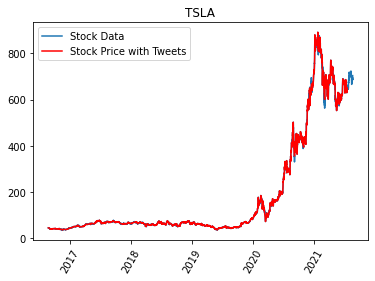

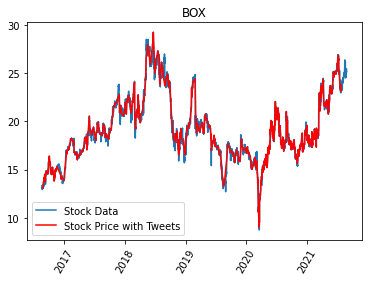

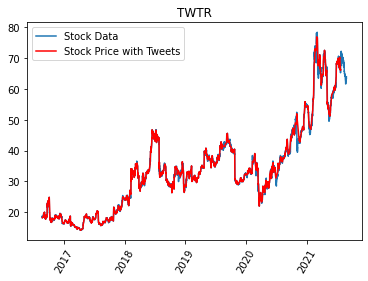

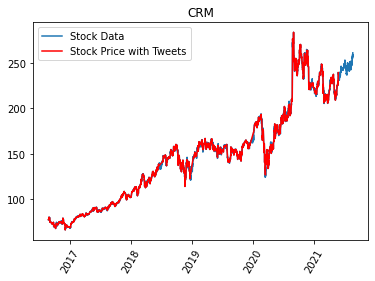

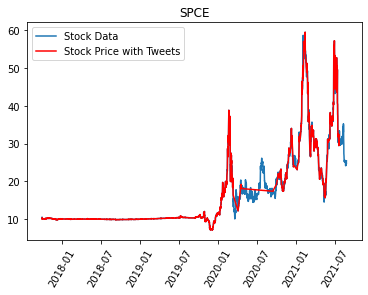

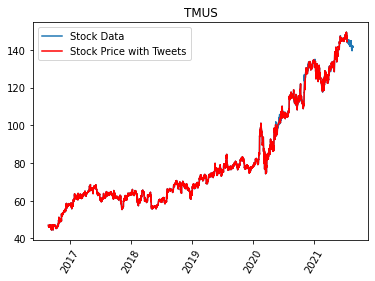

<Figure size 432x288 with 0 Axes>

In [129]:
# Let's look to see how well the full stock prices match the merged tweet and stock DataFrames
for i in range(len(stocks_list)):
    _ = plt.plot(stocks[stocks_list[i]]['date'], stocks[stocks_list[i]]['price'])
    _ = plt.plot(CEOS[CEOS_list[i]]['date'], CEOS[CEOS_list[i]]['price'], c='red')
    _ = plt.title(stocks_list[i])
    _ = plt.xticks(rotation=60)
    _ = plt.legend(['Stock Data', 'Stock Price with Tweets'])
    _ = plt.show()
    plt.savefig('./figures/data_wrangling/Price_Tweets_{}.png'.format(stocks_list[i]), bbox_inches='tight')

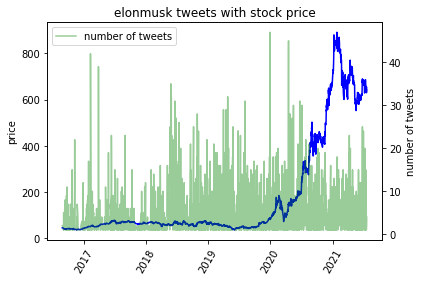

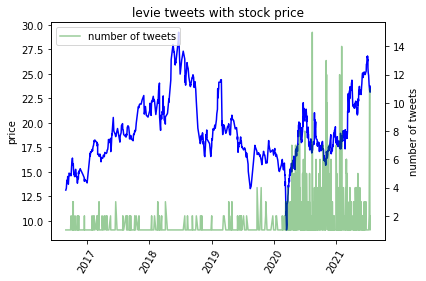

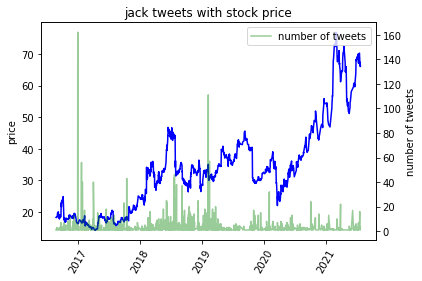

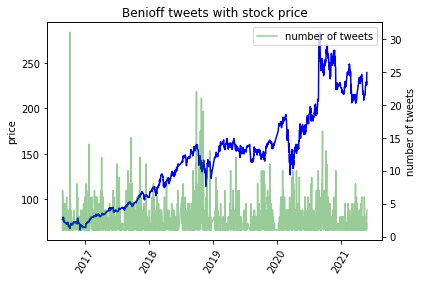

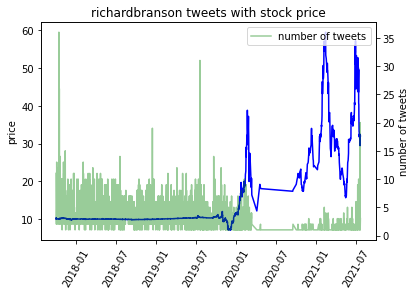

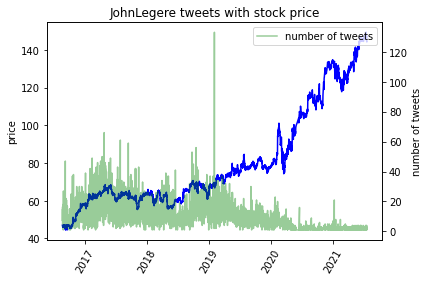

In [130]:
# Initalize a Figure and Axes
for CEO in CEOS:
    fig, ax = plt.subplots()

    # Plot the CO2 variable in blue
    ax.plot(CEOS[CEO]['date'], CEOS[CEO]['price'], color='blue')
    plt.ylabel('price')
    plt.title(f'{CEO} tweets with stock price')
    plt.xticks(rotation=60)

    # Create a twin Axes that shares the x-axis
    ax2 = ax.twinx()

    # Plot the relative temperature in red
    ax2.plot(CEOS[CEO]['date'], CEOS[CEO]['number of tweets'], color='g', alpha = 0.4)
    plt.ylabel('number of tweets')
    plt.legend(['number of tweets'])
    plt.savefig('./figures/data_wrangling/num_tweets_stock_price_{}.png'.format(CEO), bbox_inches='tight')
    plt.show()

In [131]:
test = CEOS['JohnLegere']
test2 = CEOS['richardbranson']

In [132]:
test = test[test['date'] <= '2019']
test2 = test2[test2['date'] >= '2020-07']

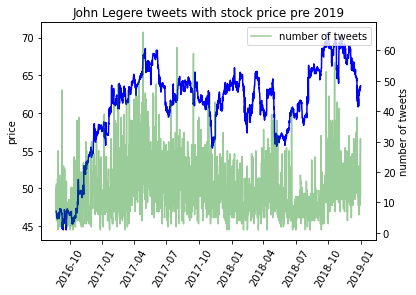

In [133]:
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(test['date'], test['price'], color='blue')
plt.ylabel('price')
plt.title('John Legere tweets with stock price pre 2019')
plt.xticks(rotation=60)

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(test['date'], test['number of tweets'], color='g', alpha = 0.4)
plt.ylabel('number of tweets')
plt.legend(['number of tweets'])
plt.savefig('./figures/data_wrangling/num_tweets_stock_price_JohnLegere_pre2019', bbox_inches='tight')
plt.show()

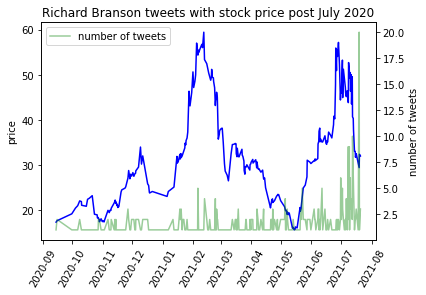

In [134]:
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(test2['date'], test2['price'], color='blue')
plt.ylabel('price')
plt.title('Richard Branson tweets with stock price post July 2020')
plt.xticks(rotation=60)

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(test2['date'], test2['number of tweets'], color='g', alpha = 0.4)
plt.ylabel('number of tweets')
plt.legend(['number of tweets'])
plt.savefig('./figures/data_wrangling/num_tweets_stock_price_richardbranson_post2020', bbox_inches='tight')
plt.show()

## 1.5 Saving Dataframes <a id='1.5_Exporting_DataFrames'></a>

In [135]:
for i in range(len(CEOS_list)):
    CEOS[CEOS_list[i]].to_pickle(f'./data/{CEOS_list[i]}_df.pkl')

In [136]:
tweet_stocks = pd.DataFrame()
for CEO in CEOS:
    tweet_stocks = tweet_stocks.append(CEOS[CEO])

In [137]:
tweet_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11738 entries, 22 to 3414
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              11738 non-null  datetime64[ns]
 1   tweet             11738 non-null  object        
 2   username          11738 non-null  object        
 3   mentions          11738 non-null  int64         
 4   hashtags          11738 non-null  int64         
 5   cashtags          11738 non-null  int64         
 6   video             11738 non-null  int64         
 7   photos            11738 non-null  int64         
 8   urls              11738 non-null  int64         
 9   thumbnail         11738 non-null  int64         
 10  replies_count     11738 non-null  int64         
 11  retweets_count    11738 non-null  int64         
 12  likes_count       11738 non-null  int64         
 13  number of tweets  11738 non-null  int64         
 14  price             1173

In [138]:
tweet_stocks.to_pickle(f'./data/tweet_stocks.pkl')

In [151]:
#for CEO in CEOS:
#    for feature in features:
#        fig, ax = plt.subplots()

        # Plot the CO2 variable in blue
#        ax.plot(CEOS[CEO]['date'], CEOS[CEO]['price'], color='blue')
#        plt.ylabel('price')
#        plt.title('{} {} with stock price'.format(CEO, feature))
#        plt.xticks(rotation=60)

        # Create a twin Axes that shares the x-axis
#        ax2 = ax.twinx()

        # Plot the relative temperature in red
#        ax2.plot(CEOS[CEO]['date'], CEOS[CEO][feature], color='g', alpha = 0.4)
#        plt.ylabel('{}'.format(feature))
#        plt.legend(['{}'.format(feature)])
#        plt.savefig('./figures/data_wrangling/{}_stock_price_{}.png'.format(feature, CEO), bbox_inches='tight')
#        plt.show()